In [3]:
#SARSA
import numpy as np
import matplotlib.pyplot as plt
import problem1_bonus as mz_b
import copy
maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
key_pos = (0,7)
# SARSA
env = mz_b.Maze_bonus(maze_mat,None,False,False,False)
n_states  = env.n_states
n_actions = env.n_actions
# Finite horizon
no_episodes = 50000
t_horizon = 200
alpha = 2/3
gamma = 49/50
n=10000
epsilon_list = [0.1]
start  = ((0, 0),(6, 5),0)
value_mat = []
probability_list =[]
Q_init = np.zeros((n_states, n_actions))
# Solve the MDP problem with dynamic programming 
print("Running epsilon "+str(epsilon_list[0]))
np.random.seed(123) 
Q, policy, value_list_1 = mz_b.SARSA(env,copy.deepcopy(Q_init),start,no_episodes,t_horizon,alpha,gamma,epsilon_list[0])
print("Simulation done")
success = 0
for _ in range(n):
    path = env.simulate(start, policy, 'ValIter')
    if path[-1][0] == (6, 5) and path[-1][2]==1:
        success += 1
probability_list.append(success/n)
print("The survice rate is: "+str(100*success/n)+"%")
value_mat[0] = value_list_1
print("Running epsilon "+str(epsilon_list[1]))
np.random.seed(123) 
Q, policy1, value_list_2 = mz_b.SARSA(env,copy.deepcopy(Q_init),start,no_episodes,t_horizon,alpha,gamma,epsilon_list[1])
print("Simulation done")
success = 0
for _ in range(n):
    path = env.simulate(start, policy, 'ValIter')
    if path[-1][0] == (6, 5) and path[-1][2]==1:
        success += 1
probability_list.append(success/n)
print("The survice rate is: "+str(100*success/n)+"%")
value_mat[1] = value_list_2
#print("Simulation done")
#method = 'ValIter'
#path = env.simulate(start, policy1, method)
# Show the shortest path 
#print(path)
#mz_b.animate_solution(maze_mat, path)

Running epsilon 0.1


Training: 100%|██████████| 50000/50000 [03:44<00:00, 222.79episode/s]


Simulation done
The survice rate is: 30.85%
Running epsilon 0.2


Training: 100%|██████████| 50000/50000 [05:01<00:00, 166.05episode/s]


Simulation done
The survice rate is: 31.19%


Running epsilon 0.1


Training:   0%|          | 0/50000 [00:00<?, ?episode/s]

Training: 100%|██████████| 50000/50000 [03:18<00:00, 251.89episode/s]


The survice rate is: 34.11%
Simulation done
Running epsilon 0.2


Training: 100%|██████████| 50000/50000 [04:24<00:00, 189.12episode/s]


The survice rate is: 30.79%
Simulation done


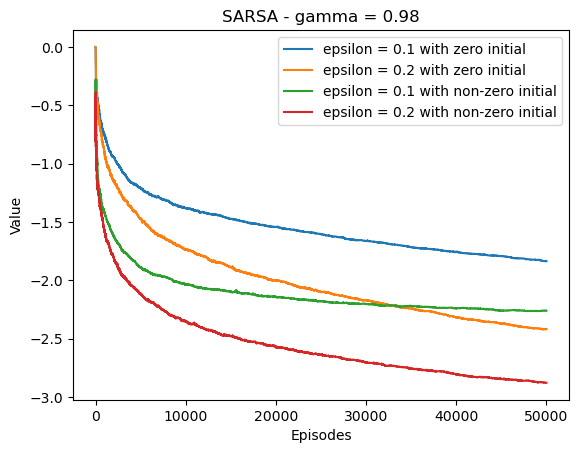

In [4]:
#random Q_init
np.random.seed(123) 
Q_init = -np.random.uniform(0, 2, (n_states, n_actions))
for s in range(n_states):
    if env.states[s][0] == env.states[s][1] or (env.maze[env.states[s][0]]==2 and env.states[s][2] == 1):
        Q_init[s,:]=np.zeros(n_actions)
for epsilon in epsilon_list:
    print("Running epsilon "+str(epsilon))
    np.random.seed(123) 
    Q, policy, value_list = mz_b.SARSA(env,copy.deepcopy(Q_init),start,no_episodes,t_horizon,alpha,gamma,epsilon)
    value_mat.append(value_list)
    success = 0
    for _ in range(n):
        path = env.simulate(start, policy, 'ValIter')
        if path[-1][0] == (6, 5) and path[-1][2]==1:
            success += 1
    probability_list.append(success/n)
    print("The survival rate is: "+str(100*success/n)+"%")
    print("Simulation done")


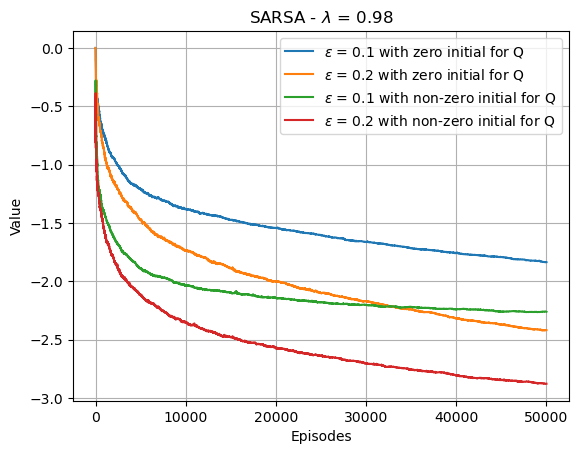

In [7]:
plt.plot(value_mat[0])
plt.plot(value_mat[1])
plt.plot(value_mat[2])
plt.plot(value_mat[3])
plt.ylabel('Value')
plt.xlabel('Episodes')
plt.title('SARSA - $\lambda$ = '+str(gamma))
plt.legend(['$\epsilon$ = '+str(epsilon_list[0])+' with zero initial for Q', '$\epsilon$ = '+str(epsilon_list[1])+' with zero initial for Q',
            '$\epsilon$ = '+str(epsilon_list[0])+' with non-zero initial for Q', '$\epsilon$ = '+str(epsilon_list[1])+' with non-zero initial for Q'])
plt.grid(visible=True)
plt.show()

In [5]:
#SARSA with decay
#SARSA
import numpy as np
import matplotlib.pyplot as plt
import problem1_bonus as mz_b
import copy
maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
key_pos = (0,7)
# SARSA
env1= mz_b.Maze_bonus(maze_mat,None,False,False,False)
n_states  = env1.n_states
n_actions = env1.n_actions
# Finite horizon
no_episodes = 50000
t_horizon = 200
alpha = 2/3
gamma = 49/50
delta_list = [0.6,0.8]
start  = ((0, 0),(6, 5),0)
value_mat = []
Q_init = np.zeros((n_states, n_actions))
# Solve the MDP problem with dynamic programming 
print("Running delta ",delta_list[0])
np.random.seed(1) 
Q, policy, value_list_1 = mz_b.SARSA_with_decay(env1,copy.deepcopy(Q_init),start,no_episodes,t_horizon,alpha,gamma,delta_list[0])
print("Simulation done")
value_mat.append(value_list_1)
# success = 0
# for _ in range(n):
#     path = env.simulate(start, policy, 'ValIter')
#     if path[-1][0] == (6, 5) and path[-1][2]==1:
#         success += 1
# probability_list.append(success/n)
# print("The survival rate is: "+str(100*success/n)+"%")
print("Running delta ",delta_list[1])
np.random.seed(1) 
env2 = mz_b.Maze_bonus(maze_mat,None,False,False,False)
Q, policy, value_list_2 = mz_b.SARSA_with_decay(env2,copy.deepcopy(Q_init),start,no_episodes,t_horizon,alpha,gamma,delta_list[1])
print("Simulation done")
value_mat.append(value_list_2)
# success = 0
# for _ in range(n):
#     path = env.simulate(start, policy, 'ValIter')
#     if path[-1][0] == (6, 5) and path[-1][2]==1:
#         success += 1
# probability_list.append(success/n)
# print("The survival rate is: "+str(100*success/n)+"%")


Running delta  0.6


Training: 100%|██████████| 50000/50000 [04:52<00:00, 171.14episode/s]


Simulation done
Running delta  0.8


Training: 100%|██████████| 50000/50000 [04:09<00:00, 200.54episode/s]

Simulation done


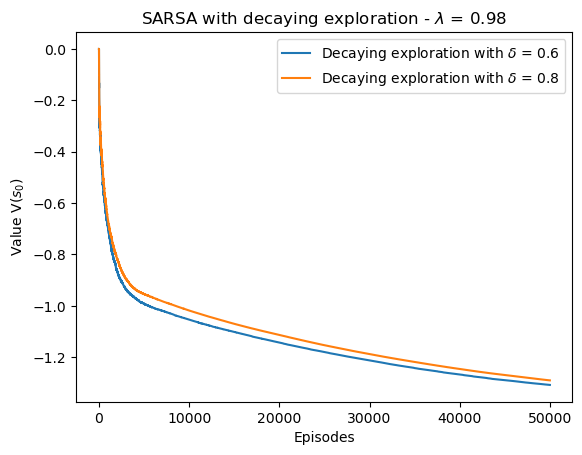

In [7]:

plt.plot(value_mat[0])
plt.plot(value_mat[1])
plt.ylabel('Value V($s_0$)')
plt.xlabel('Episodes')
plt.title('SARSA with decaying exploration - $\lambda$ = '+str(gamma))
plt.legend(['Decaying exploration with $\delta$ = '+str(delta_list[0]), 'Decaying exploration with $\delta$ = '+str(delta_list[1])])
plt.show()
